In [ ]:
import numpy as np 
from tensorflow import keras 
from keras import layers 
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(y_train)
print(y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


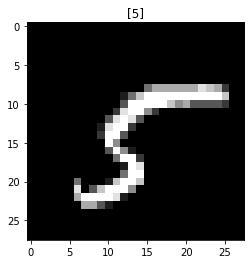

In [ ]:
# lets see some random images and its labels
import random
import matplotlib.pyplot as plt
i = random.randint(0,60000)
plt.imshow(x_train[i],cmap='gray') # Color map
plt.title([y_train[i]])
plt.show()

In [ ]:
# How many images are there in every digit?
import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
# Normalization : Scaling down the value to a specific range(0-1)
x_train=x_train/255
x_test = x_test/255

In [ ]:
# AFter Normalization
print(x_train.max())
print(x_train.min())

1.0
0.0


In [ ]:
from keras.layers import Dense
from keras.layers import Flatten
model = keras.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(392,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3801 - accuracy: 0.8910 - val_loss: 0.1204 - val_accuracy: 0.9633
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0983 - accuracy: 0.9702 - val_loss: 0.0867 - val_accuracy: 0.9736
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0563 - accuracy: 0.9836 - val_loss: 0.0848 - val_accuracy: 0.9741
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0385 - accuracy: 0.9882 - val_loss: 0.0798 - val_accuracy: 0.9773
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.0794 - val_accuracy: 0.9772
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0882 - val_accuracy: 0.9758
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0164 - accuracy: 0.9949 - val_loss: 0.0793 - val_accuracy:

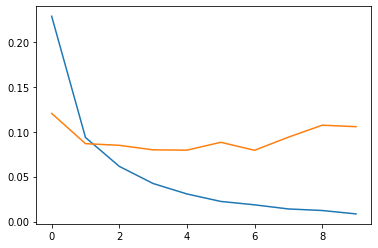

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

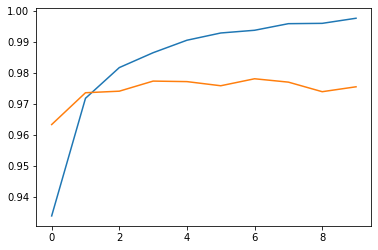

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
# Evaluate on test data
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_pred,y_test)

0.9764

In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 973,    0,    3,    2,    2,    2,    5,    1,    4,    2],
       [   1, 1126,    0,    0,    0,    0,    2,    4,    1,    2],
       [   0,    5, 1017,   10,    2,    0,    1,    9,   11,    1],
       [   1,    0,    1,  982,    1,    9,    1,    1,   10,    0],
       [   0,    0,    1,    0,  952,    0,    2,    1,    5,    4],
       [   0,    0,    0,    3,    0,  866,    3,    0,    2,    1],
       [   2,    2,    2,    0,    4,    5,  944,    0,    6,    0],
       [   0,    0,    7,    3,    2,    2,    0, 1000,    4,    2],
       [   2,    2,    0,    0,    1,    2,    0,    1,  907,    0],
       [   1,    0,    1,   10,   18,    6,    0,   11,   24,  997]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       994
           1       0.99      0.99      0.99      1136
           2       0.99      0.96      0.97      1056
           3       0.97      0.98      0.97      1006
           4       0.97      0.99      0.98       965
           5       0.97      0.99      0.98       875
           6       0.99      0.98      0.98       965
           7       0.97      0.98      0.98      1020
           8       0.93      0.99      0.96       915
           9       0.99      0.93      0.96      1068

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
# save the model
model.save('mnist.hdf5')